<a href="https://colab.research.google.com/github/jibintom/Machine-Learning-Codebasics-/blob/main/a18.%20Principal%20Component%20Analysis%20(PCA)/Principal_Component_Analysis_Heart_Disease.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download heart disease dataset heart.csv in Exercise folder and do following, (credits of dataset: https://www.kaggle.com/fedesoriano/heart-failure-prediction)



1. Load heart disease dataset in pandas dataframe
2. Remove outliers using Z score. Usual guideline is to remove anything that has Z score > 3 formula or Z score < -3
3. Convert text columns to numbers using label encoding and one hot encoding
4. Apply scaling
5. Build a classification model using various methods (SVM, logistic regression, random forest) and check which model gives you the best accuracy
6. Now use PCA to reduce dimensions, retrain your model and see what impact it has on your model in terms of accuracy. Keep in mind that many times doing PCA reduces the accuracy but computation is much lighter and that's the trade off you need to consider while building models in real life

In [136]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd

df=pd.read_csv("heart_19.csv")
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


**Explore the Data**

In [137]:
df.shape

(918, 12)

In [138]:
df.isnull().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

**Remove the Outliers Using Z--Score method**

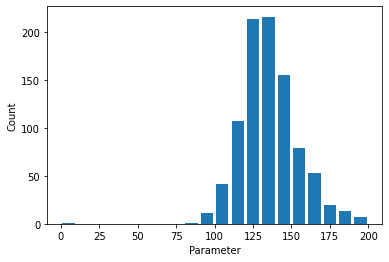

In [139]:
#plot histogram to analyse the data

import matplotlib.pyplot as plt
%matplotlib inline

def histogram(x):
  plt.hist(x, bins=20, rwidth=.8)
  plt.xlabel("Parameter")
  plt.ylabel("Count")
  plt.show

histogram(df.RestingBP)

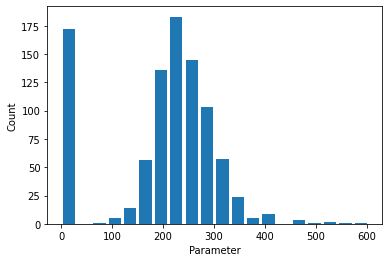

In [140]:
histogram(df.Cholesterol)

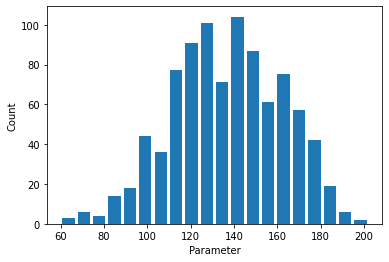

In [141]:
histogram(df.MaxHR)

**Z-Score for Cholesterol**

In [142]:
df["Cholesterol_zscore"]=(df.Cholesterol-df.Cholesterol.mean())/(df.Cholesterol.std())
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.824621
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.769768
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.034736


In [143]:
df[(df.Cholesterol_zscore >3) | (df.Cholesterol_zscore <-3)] 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_zscore
76,32,M,ASY,118,529,0,Normal,130,N,0.0,Flat,1,3.018723
149,54,M,ASY,130,603,1,Normal,125,Y,1.0,Flat,1,3.695238
616,67,F,NAP,115,564,0,LVH,160,N,1.6,Flat,0,3.338696


In [144]:
df1=df[(df.Cholesterol_zscore <3) & (df.Cholesterol_zscore >-3)] 
df1.shape

(915, 13)

**Z-Score for MaxHr**

In [145]:
df1["MaxHR_zscore"]=(df1.MaxHR-df1.MaxHR.mean())/(df1.MaxHR.std())
df1.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_zscore,MaxHR_zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.824621,1.380949
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867,0.753167
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.769768,-1.522543
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964,-1.130179
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.034736,-0.580870


In [146]:
df1[(df1.MaxHR_zscore >3) | (df1.MaxHR_zscore <-3)] 

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_zscore,MaxHR_zscore
390,51,M,ASY,140,0,0,Normal,60,N,0.0,Flat,1,-1.817444,-3.013525


In [147]:
df2=df1[(df1.MaxHR_zscore <3) & (df1.MaxHR_zscore >-3)] 
df2.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_zscore,MaxHR_zscore
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0,0.824621,1.380949
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1,-0.171867,0.753167
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0,0.769768,-1.522543
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1,0.138964,-1.130179
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0,-0.034736,-0.580870


In [148]:
df2.shape

(914, 14)

**Z-Score for RestingBP**

```
# This is formatted as code
```



In [149]:
df2["RestingBP_zscore"]=(df.RestingBP-df.RestingBP.mean())/(df.RestingBP.std())

In [150]:
df2[(df2.RestingBP_zscore > 3) | (df2.RestingBP_zscore < -3)]

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease,Cholesterol_zscore,MaxHR_zscore,RestingBP_zscore
109,39,M,ATA,190,241,0,Normal,106,N,0.0,Up,0,0.385800,-1.208652,3.111322
241,54,M,ASY,200,198,0,Normal,142,Y,2.0,Flat,1,-0.007310,0.203858,3.651449
365,64,F,ASY,200,0,0,Normal,140,Y,1.0,Flat,1,-1.817444,0.125385,3.651449
399,61,M,NAP,200,0,1,ST,70,N,0.0,Flat,1,-1.817444,-2.621161,3.651449
449,55,M,NAP,0,0,0,Normal,155,N,1.5,Flat,1,-1.817444,0.713930,-7.151097
592,61,M,ASY,190,287,1,LVH,150,Y,2.0,Down,1,0.806337,0.517749,3.111322
732,56,F,ASY,200,288,1,LVH,133,Y,4.0,Down,1,0.815479,-0.149270,3.651449
759,54,M,ATA,192,283,0,LVH,195,N,0.0,Up,1,0.769768,2.283385,3.219347


In [151]:
df3=df2[(df2.RestingBP_zscore < 3) & (df2.RestingBP_zscore > -3)]
df3.shape

(906, 15)

In [152]:
df_n0_outlier=df3.drop(["Cholesterol_zscore",	"MaxHR_zscore",	"RestingBP_zscore"], axis=1)
df_n0_outlier.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [153]:
df_n0_outlier.shape

(906, 12)

**Treating Categorial Values which having weightage**

In [154]:
import numpy as np

np.unique(df.ChestPainType)

array(['ASY', 'ATA', 'NAP', 'TA'], dtype=object)

In [155]:
np.unique(df.RestingECG	)

array(['LVH', 'Normal', 'ST'], dtype=object)

In [156]:
np.unique(df.ExerciseAngina)

array(['N', 'Y'], dtype=object)

In [157]:
np.unique(df.ST_Slope)

array(['Down', 'Flat', 'Up'], dtype=object)

In [158]:
df4 = df_n0_outlier.copy()

df4.ExerciseAngina.replace({'N':0, 'Y':1}, inplace=True)

df.ST_Slope.replace({'Down':1, 'Flat':2, 'Up':3}, inplace=True)

df4.RestingECG.replace({'LVH':3, 'Normal':1, 'ST':2}, inplace=True)

In [159]:
df4.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,1,172,0,0.0,Up,0
1,49,F,NAP,160,180,0,1,156,0,1.0,Flat,1
2,37,M,ATA,130,283,0,2,98,0,0.0,Up,0
3,48,F,ASY,138,214,0,1,108,1,1.5,Flat,1
4,54,M,NAP,150,195,0,1,122,0,0.0,Up,0


**Use get_dummies to handle remaining categorical value**

In [160]:
df5=pd.get_dummies(df4, drop_first=True)
df5.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,1,172,0,0.0,0,1,1,0,0,0,1
1,49,160,180,0,1,156,0,1.0,1,0,0,1,0,1,0
2,37,130,283,0,2,98,0,0.0,0,1,1,0,0,0,1
3,48,138,214,0,1,108,1,1.5,1,0,0,0,0,1,0
4,54,150,195,0,1,122,0,0.0,0,1,0,1,0,0,1


**Scale the Data**

In [161]:
x=df5.drop(["HeartDisease"], axis=1)
y=df5.HeartDisease

In [162]:
x.head()

,Age,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,1,172,0,0.0,1,1,0,0,0,1
1,49,160,180,0,1,156,0,1.0,0,0,1,0,1,0
2,37,130,283,0,2,98,0,0.0,1,1,0,0,0,1
3,48,138,214,0,1,108,1,1.5,0,0,0,0,1,0
4,54,150,195,0,1,122,0,0.0,1,0,1,0,0,1


In [163]:
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
x_ss=ss.fit_transform(x)
x_ss

array([[-1.43268734,  0.46074981,  0.848846  , ..., -0.23127553,
        -0.99779493,  1.14251631],
       [-0.47787471,  1.62434375, -0.16934854, ..., -0.23127553,
         1.00220995, -0.87526103],
       [-1.75095822, -0.12104716,  0.79279859, ..., -0.23127553,
        -0.99779493,  1.14251631],
       ...,
       [ 0.37084763, -0.12104716, -0.62706901, ..., -0.23127553,
         1.00220995, -0.87526103],
       [ 0.37084763, -0.12104716,  0.35376058, ..., -0.23127553,
         1.00220995, -0.87526103],
       [-1.64486793,  0.34439041, -0.21605471, ..., -0.23127553,
        -0.99779493,  1.14251631]])

**Training and Testing of Data**

In [164]:
from sklearn.model_selection import train_test_split  
x_train,x_test,y_train,y_test=train_test_split(x_ss,y, test_size=.3, random_state=10)

In [165]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_train,y_train)

rfc.score(x_test,y_test)

0.8786764705882353

**Use PCA to reduce dimensions**

In [166]:
from sklearn.decomposition import PCA
pca=PCA(.50)
x_pca=pca.fit_transform(x_ss)
x_pca.shape

(906, 4)

In [167]:
x_ss.shape

(906, 14)

In [168]:
from sklearn.model_selection import train_test_split 
x_pca_train,x_pca_test,y_train,y_test=train_test_split(x_pca,y, test_size=.3, random_state=10)

In [169]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
rfc.fit(x_pca_train,y_train)

rfc.score(x_pca_test,y_test)

0.8566176470588235